# 1 우리나라 무역의존도 추이

- [1. 대외개방도](#1.-대외개방도)
- [2. 데이터](#2.-데이터)
- [3. 주요국 대외개방도 비교](#3.-주요국-대외개방도-비교)

## 1. 대외개방도

한 나라의 세계 경제 통합 정도를 가장 자연스럽게 측정할 수 있는 지표는 개방도(openness)이다. 어떤 나라 $i$의 총수출($X_i$), 총수입($M_i$), GDP($Y_i$)를 사용해 $i$국의 대외개방도를 계산하면 다음과 같다.

$$
O_i = \frac{X_i + M_i}{Y_i}
$$

이를 **무역의존도**라 부르기도 한다. $O_i$ 값이 높을수록 해당 국가는 더 개방적이다. 싱가포르와 같은 작은 개방 경제의 경우, 이 개방도 지표는 1을 훨씬 초과한다. 이 개방도 지표는 시간에 따라 추적할 수 있다. [Penn World Tables(PWT)](https://www.rug.nl/ggdc/productivity/pwt/)는 여러 연도를 포괄하는 개방도 지표를 제공한다.

## 2. 데이터

데이터 출처: [PWT 10.01, Penn World Table version 10.01](https://www.rug.nl/ggdc/productivity/pwt/)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 읽기
#df = pd.read_excel("https://dataverse.nl/api/access/datafile/354095", sheet_name="Data")
df = pd.read_excel("../Data/pwt1001.xlsx", sheet_name="Data")
df.tail()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
12805,ZWE,Zimbabwe,US Dollar,2015,40141.617188,39798.644531,13.814629,6.393752,NaN,2.584653,...,0.140172,-0.287693,-0.051930,0.479228,0.651287,0.541446,0.616689,0.533235,0.425715,1.778124
12806,ZWE,Zimbabwe,US Dollar,2016,41875.203125,40963.191406,14.030331,6.504374,NaN,2.616257,...,0.131920,-0.251232,-0.016258,0.470640,0.651027,0.539631,0.619789,0.519718,0.419446,1.728804
12807,ZWE,Zimbabwe,US Dollar,2017,44672.175781,44316.742188,14.236595,6.611773,NaN,2.648248,...,0.126722,-0.202827,-0.039897,0.473560,0.639560,0.519956,0.619739,0.552042,0.418681,1.756007
12808,ZWE,Zimbabwe,US Dollar,2018,44325.109375,43420.898438,14.438802,6.714952,NaN,2.680630,...,0.144485,-0.263658,-0.020791,0.543757,0.655473,0.529867,0.641361,0.561526,0.426527,1.830088
12809,ZWE,Zimbabwe,US Dollar,2019,42296.062500,40826.570312,14.645468,6.831017,NaN,2.713408,...,0.213562,-0.270959,-0.089798,0.494755,0.652439,0.500927,0.487763,0.430082,0.419883,1.580885


**변수**

| 변수명 | 변수 설명 |
|:---|:---|
| **식별 변수** | |
| countrycode | 3자리 ISO 국가 코드 |
| country | 국가명 |
| currency_unit | 통화 단위 |
| year | 연도 |
| **실질 GDP, 고용 및 인구 수준** | |
| rgdpe | 지출 측면 실질 GDP (연쇄 PPP, 2017년 기준 백만 달러) |
| rgdpo | 생산 측면 실질 GDP (연쇄 PPP, 2017년 기준 백만 달러) |
| pop | 인구 (백만 명) |
| emp | 종사자 수 (백만 명) |
| avh | 종사자의 연평균 근로 시간 |
| hc | 인적 자본 지수 (교육 연수 및 교육 수익률 기반, PWT9의 인적 자본 참고) |
| **경상 가격 GDP, 자본, 총요소생산성(TFP)** | |
| ccon | 가계 및 정부의 실질 소비 (경상 PPP, 2017년 기준 백만 달러) |
| cda | 실질 국내 absorption (실질 소비 + 투자, 경상 PPP, 2017년 기준 백만 달러) |
| cgdpe | 지출 측면 실질 GDP (경상 PPP, 2017년 기준 백만 달러) |
| cgdpo | 생산 측면 실질 GDP (경상 PPP, 2017년 기준 백만 달러) |
| cn | 자본 스톡 (경상 PPP, 2017년 기준 백만 달러) |
| ck | 자본 서비스 수준 (경상 PPP, 미국 = 1) |
| ctfp | 총요소생산성(TFP) 수준 (경상 PPP, 미국 = 1) |
| cwtfp | 복지 관련 총요소생산성(TFP) 수준 (경상 PPP, 미국 = 1) |
| **국민계정 기반 변수** | |
| rgdpna | 실질 GDP (2017년 불변 가격, 백만 달러) |
| rconna | 실질 소비 (2017년 불변 가격, 백만 달러) |
| rdana | 실질 국내 absorption (2017년 불변 가격, 백만 달러) |
| rnna | 자본 스톡 (2017년 불변 가격, 백만 달러) |
| rkna | 자본 서비스 수준 (2017년 불변 가격, 2017년 = 1) |
| rtfpna | 총요소생산성(TFP) 수준 (2017년 불변 가격, 2017년 = 1) |
| rwtfpna | 복지 관련 총요소생산성(TFP) 수준 (2017년 불변 가격, 2017년 = 1) |
| labsh | GDP에서 노동 보상의 비율 (경상 국가 가격 기준) |
| irr | 실질 내부 수익률 |
| delta | 자본 스톡의 평균 감가상각률 |
| **환율 및 GDP 물가 수준** | |
| xr | 환율 (해당국 통화/USD, 시장 + 추정치) |
| pl_con | CCON(PPP/XR)의 가격 수준, 2017년 미국 GDPo의 가격 수준 = 1 |
| pl_da | CDA(PPP/XR)의 가격 수준, 2017년 미국 GDPo의 가격 수준 = 1 |
| pl_gdpo | CGDPo(PPP/XR)의 가격 수준, 2017년 미국 GDPo의 가격 수준 = 1 |
| **데이터 정보 변수** | |
| i_cig | 0/1/2/3/4: 소비, 투자, 정부 부문의 상대 가격 데이터가 외삽(0), 기준값(1), 보간(2), ICP PPP 시계열: 기준값 또는 보간(3), ICP PPP 시계열: 외삽(4) |
| i_xm | 0/1/2: 수출 및 수입의 상대 가격 데이터가 외삽(0), 기준값(1), 보간(2) |
| i_xr | 0/1: 환율이 시장 기반(0) 또는 추정값(1) |
| i_outlier | 0/1: pl_gdpe 또는 pl_gdpo의 관측치가 이상치가 아님(0) 또는 이상치(1) |
| i_irr | 0/1/2/3: irr 관측치가 이상치가 아님(0), 낮은 자본 비율로 인해 편향될 가능성 있음(1), 하한 1%에 도달(2), 이상치(3) |
| cor_exp | 해당국과 미국 간 지출 비율의 상관관계 (기준값 관측치만 포함) |
| statcap | 통계 역량 지표 (출처: 세계은행, 개발도상국만) |
| **CGDPo 대비 비율** | |
| csh_c | 경상 PPP 기준 가계 소비 비율 |
| csh_i | 경상 PPP 기준 총 자본 형성 비율 |
| csh_g | 경상 PPP 기준 정부 소비 비율 |
| csh_x | 경상 PPP 기준 상품 수출 비율 |
| csh_m | 경상 PPP 기준 상품 수입 비율(마이너스로 표현) |
| csh_r | 경상 PPP 기준 잔여 무역 및 GDP 통계적 불일치 비율 |
| **가격 수준, 지출 범주 및 자본** | |
| pl_c | 가계 소비 가격 수준, 2017년 미국 GDPo 기준=1 |
| pl_i | 자본 형성 가격 수준, 2017년 미국 GDPo 기준=1 |
| pl_g | 정부 소비 가격 수준, 2017년 미국 GDPo 기준=1 |
| pl_x | 수출 가격 수준, 2017년 미국 GDPo 기준=1 |
| pl_m | 수입 가격 수준, 2017년 미국 GDPo 기준=1 |
| pl_n | 자본 스톡 가격 수준, 2017년 미국 기준=1 |
| pl_k | 자본 서비스 가격 수준, 미국 기준=1 |


### 참고: 경상 PPP 기준의 의미

2005년 미국과 한국의 명목 GDP가 다음과 같다고 해보자. 
- 미국 GDP: 15조 달러
- 한국 GDP: 1,000조 원
- 명목환율: 1달러 = 1,000원

이 경우, 시장 환율을 사용하여 한국과 미국의 경제 규모를 비교하면, 한국의 GDP는 1조 달러로 미국의 1/15이다. 거꾸로 미국의 GDP는 한국의 15배다.

그런데 2005년 한국에서 1,000원(1달러)으로 살 수 있는 물건과 미국에서 1달러로 살 수 있는 물건은 다르다. 한국의 물가가 상대적으로 낮기 때문에, 동일한 금액으로 한국에서 더 많은 재화와 서비스를 구매할 수 있다. 간단히 말해 양국 통화의 구매력이 다른 것이다. 

- 2005년 미국에서 빅맥 햄버거 한 개가 5달러인데, 한국에서는 같은 빅맥이 3,500원(3.5달러)에 구매 가능하다고 해보자. 물가가 낮은 한국에서는 3.5달러로 빅맥 1개를 살 수 있지만, 미국에서는 그 돈으로 빅맥 1개를 살 수 없는 것이다.
- 이런 사정을 반영하여 양국 통화의 구매력을 동일하게 만들어주는 **PPP**(Purchasing Power Parity) 환율을 산출해볼 수 있다. 이 예에서는 5달러 = 3,500원, 즉 1달러 = 700원이다.

이렇게 산출한 PPP 환율을 적용하여 한국의 GDP를 다시 계산해 보면 1,000조 원 ÷ 700원 = 약 1.43조 달러다. 이것이 **경상(current) PPP 기준** GDP의 의미다.

이제 2005년 미국과 한국의 GDP를 경상 PPP 기준으로 비교하면:
- 미국 GDP (경상 PPP 기준): 15조 달러
- 한국 GDP (경상 PPP 기준): 1.43조 달러

2005년 미국과 한국의 명목 GDP를 시장 환율로 비교하면, 미국 GDP는 한국의 15배지만, 경상 PPP 기준으로는 미국 GDP는 한국의 10.5배 수준으로 줄어든다. 한국 기준으로 말하면, 시장 환율을 적용할 경우 한국 GDP는 미국의 1/15이지만, PPP 환율을 적용하면 한국 GDP는 미국의 1.43/15 수준으로 늘어난다.

## 3. 주요국 대외개방도 비교

**대외개방도 계산**

- Penn World Tables(PWT) 통계에서 대외개방도를 구하기 위해서는 경상 PPP 기준 상품 수출 비율(`csh_x`)과 경상 PPP 기준 상품 수입 비율(`csh_m`에 마이너스를 취한 값)을 더하면 된다.

In [2]:
df["open"] = (df["csh_x"] - df["csh_m"]) * 100

### 20대 경제대국의 대외개방도

- 아래 결과를 보면, 2019년 경상 PPP 기준 20대 경제대국 중 한국의 대외개방도는 86.9%로 독일(115.5%) 다음으로 높은 2위를 차지했다.  
- 경상 PPP 기준으로는 인도네시아나 브라질의 경제규모가 10위권 안에 들어오는 것도 눈에 띈다.

In [3]:
# 2019년 기준으로 df["cgdpo"]가 가장 큰 20개국 필터링
top_20_countries = df[df["year"] == 2019].nlargest(20, "cgdpo").copy()

# df["open"] 값을 기준으로 랭킹 매기기 (내림차순)
top_20_countries["open_rank"] = top_20_countries["open"].rank(ascending=False, method="dense").astype(int)

# open 소수점 1자리로 변환
top_20_countries["open"] = top_20_countries["open"].round(1)

# 결과 반환 (index 제거)
top_20_countries = top_20_countries[["country", "open", "open_rank"]].reset_index(drop=True)
top_20_countries

,country,open,open_rank
0,United States,27.7,14
1,China,36.0,13
2,India,12.9,19
3,Japan,38.2,12
4,Germany,115.5,1
5,Russian Federation,26.5,17
6,Indonesia,17.1,18
7,Brazil,27.1,15
8,United Kingdom,57.4,8
9,France,60.2,5


### 대외개방도 최상위 10개국

- 경제규모와 상관없이 따졌을 때, 2019년 경상 PPP 기준으로 세계에서 대외개방도가 가장 높은 경제는 홍콩으로 444.6%이다. 
- 벨기에(261.1%), 싱가포르(226.7%), 네덜란드(177.5%) 등이 10위권에 속한다. 

In [4]:
# 2019년 기준으로 df["open"]가 가장 큰 10개국 필터링
top_10_countries = df[df["year"] == 2019].nlargest(10, "open").copy()

# df["open"] 값을 기준으로 랭킹 매기기 (내림차순)
top_10_countries["open_rank"] = top_10_countries["open"].rank(ascending=False, method="dense").astype(int)

# open 소수점 1자리로 변환
top_10_countries["open"] = top_10_countries["open"].round(1)

# 결과 반환
top_10_countries = top_10_countries[["country", "open", "open_rank"]].reset_index(drop=True)
top_10_countries

,country,open,open_rank
0,"China, Hong Kong SAR",444.6,1
1,Anguilla,392.6,2
2,British Virgin Islands,316.0,3
3,Djibouti,275.8,4
4,Belgium,261.1,5
5,Singapore,226.7,6
6,Cayman Islands,226.6,7
7,Aruba,206.5,8
8,Slovakia,187.9,9
9,Netherlands,177.5,10


### 한미일중 대외개방도 변화 추이

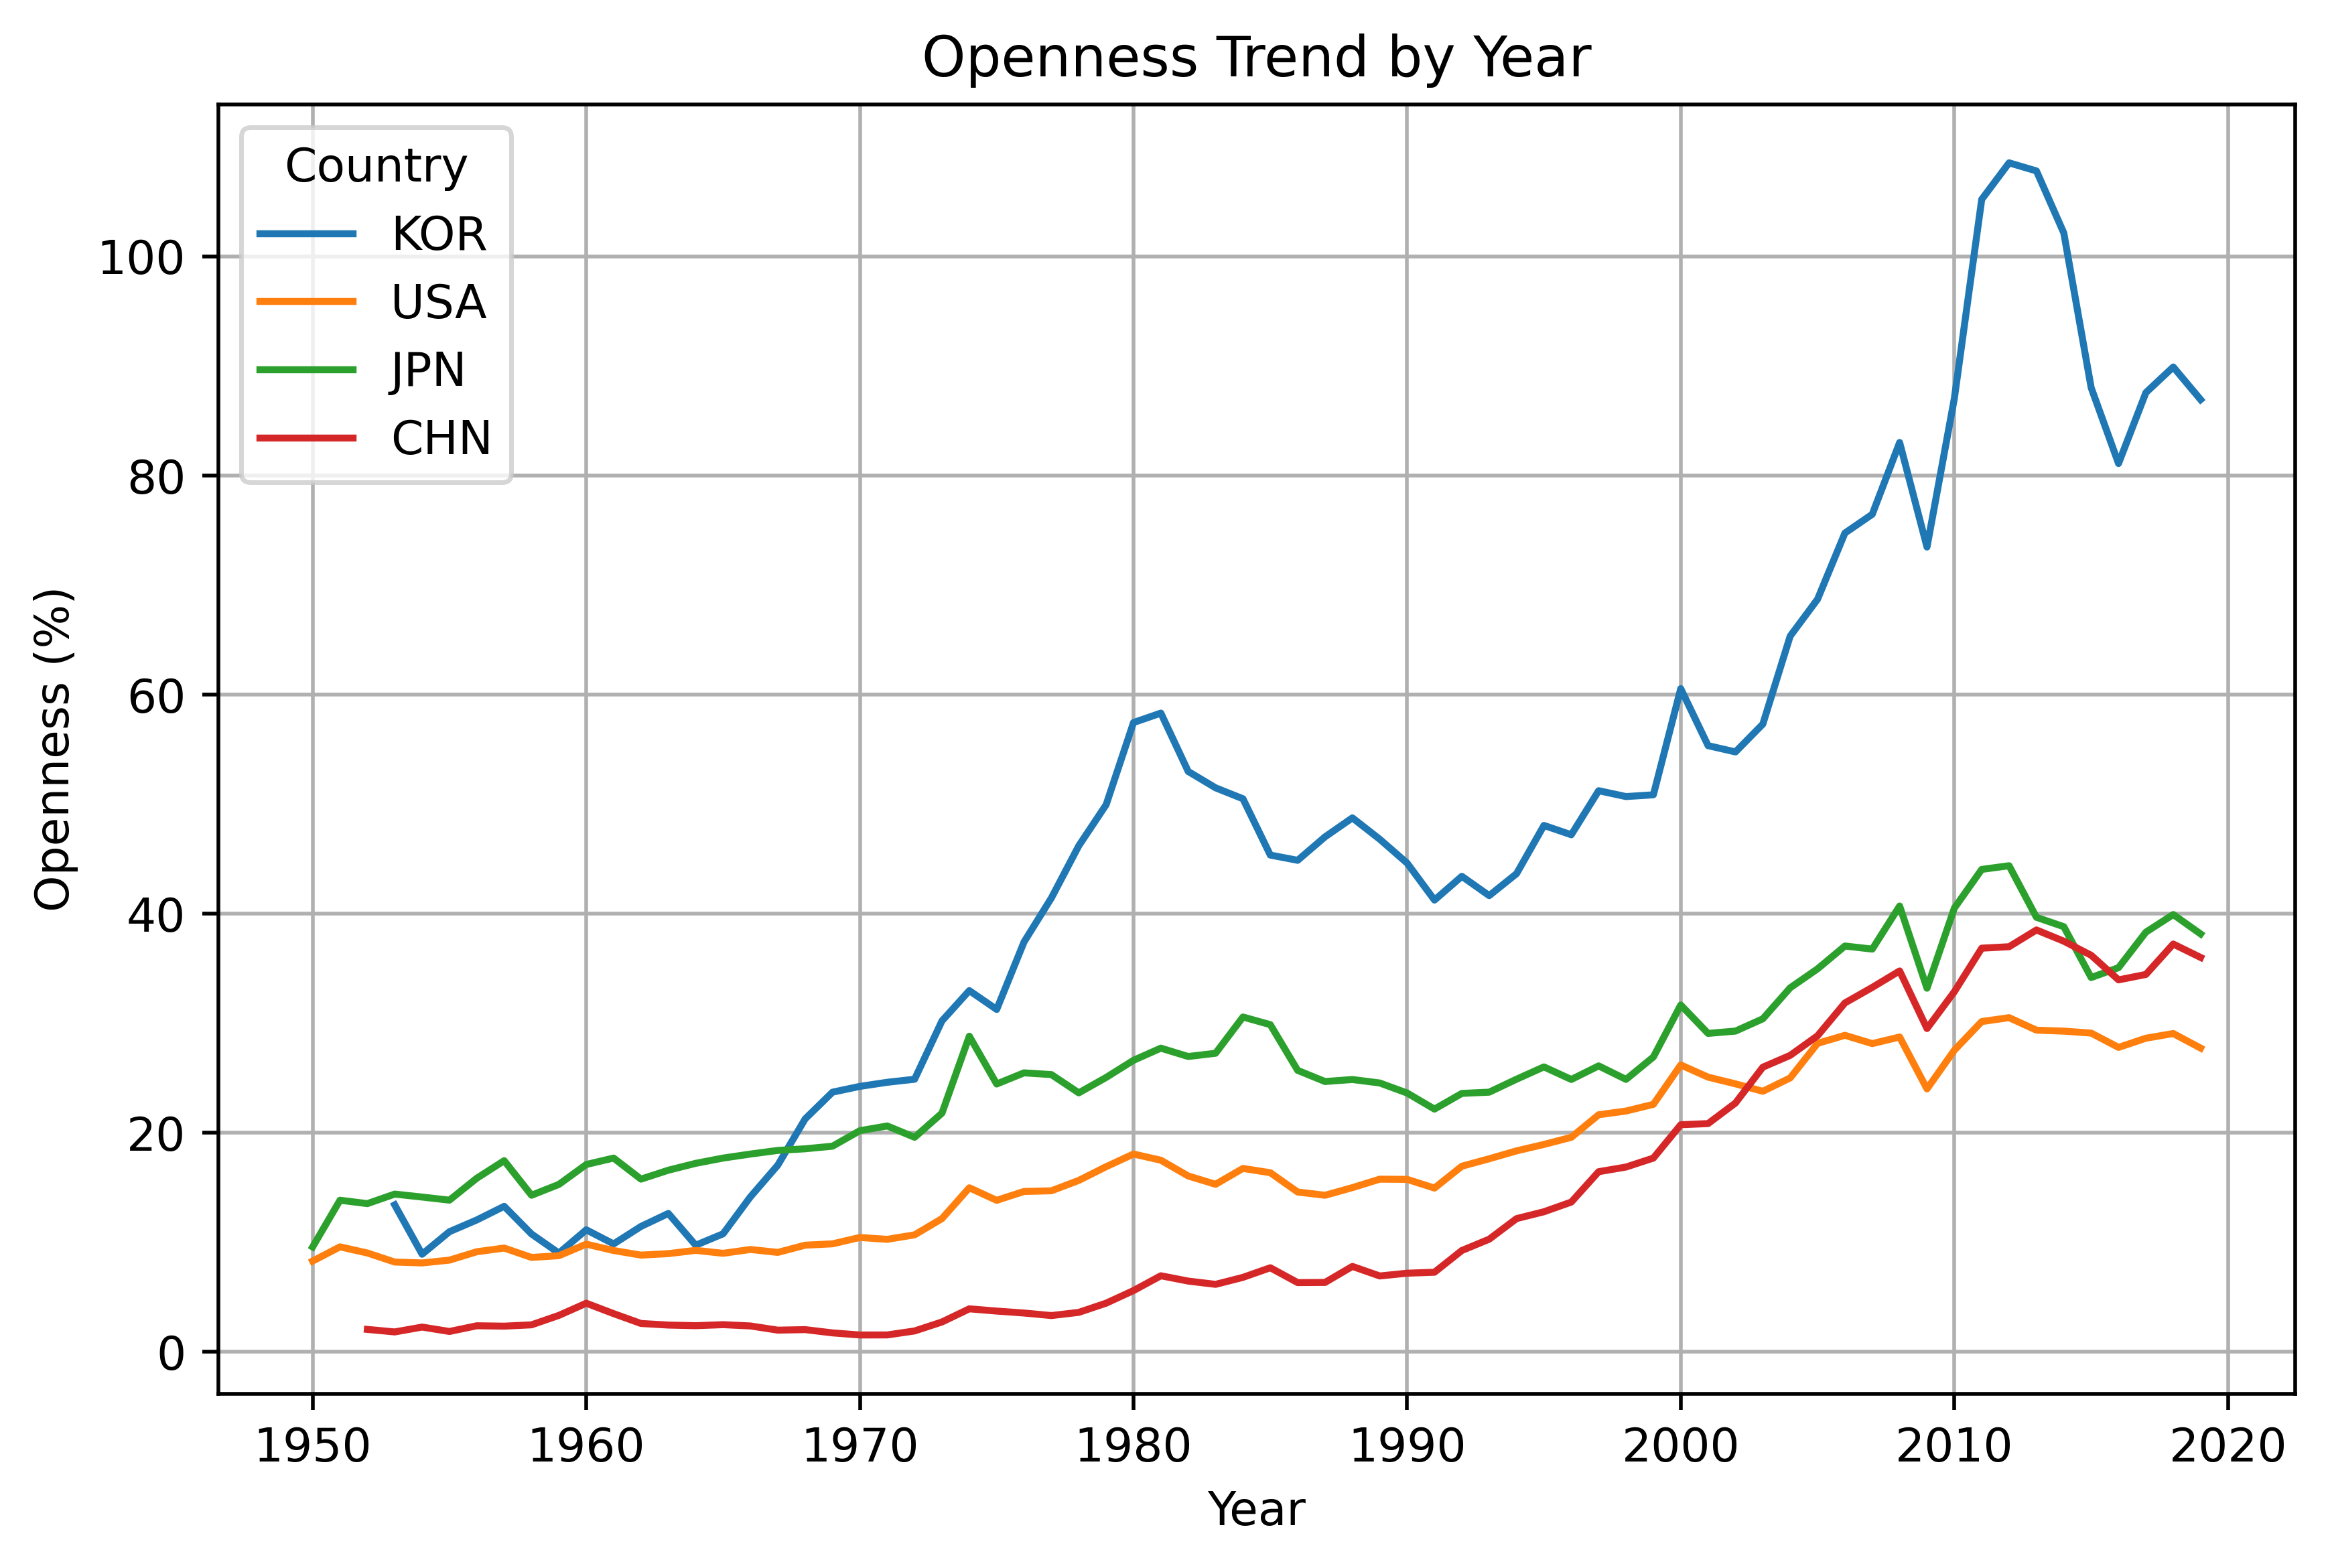

In [5]:
import matplotlib.pyplot as plt

# 4개국 필터링
selected_countries = ["KOR", "USA", "JPN", "CHN"]
filtered_df = df[df["countrycode"].isin(selected_countries)]

# 선 그래프 그리기
plt.figure(figsize=(8,5), dpi=500)

for country in selected_countries:
    country_data = filtered_df[filtered_df["countrycode"] == country]
    plt.plot(country_data["year"], country_data["open"], label=country)

# 그래프 설정
plt.xlabel("Year")
plt.ylabel("Openness (%)")
plt.title("Openness Trend by Year")
plt.legend(title="Country")
plt.grid(True)
plt.show()